In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('1_feature_engineered.csv')

In [41]:
df.head(2)
len(df)

3483

## X and y

In [4]:
df1 = df.drop(columns = ['Unnamed: 0', 'hipster', 'validated', '0'])
df2 = df1.drop(columns = ['categories'])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


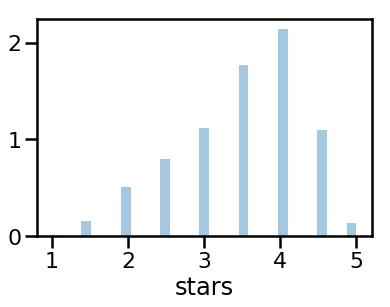

In [45]:
df2['success'] = df2['is_open'] *df2['stars']
sns.distplot(df2['stars'],norm_hist=True, kde=False);

In [6]:
df2['y'] = df2['success'] > 3
#sns.distplot(df3['success'], kde=False);
df2['y'].replace(True, 1, inplace=True)
df2['y'].replace(False, 0, inplace=True)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


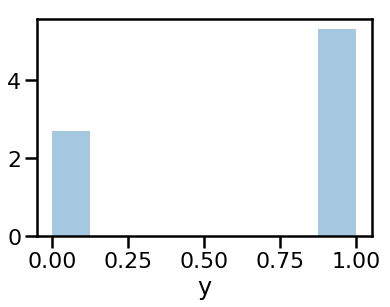

In [46]:
sns.distplot(df2['y'], norm_hist=True,kde=False);

In [8]:
Y = df2['y']
Y = Y.apply(pd.to_numeric, errors='coerce')
X = df2.drop(columns = ['y', 'success', 'BusinessName', 'stars', 'is_open', 'total', 'checkin per hour'])
X=X.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

y = np.ravel(np.array(Y))



In [9]:
df3 = df2.drop(columns = ['success', 'BusinessName', 'stars', 'is_open', 'total', 'checkin per hour'])
df3.fillna(0, inplace=True)

In [10]:
type(df3.columns)

pandas.core.indexes.base.Index

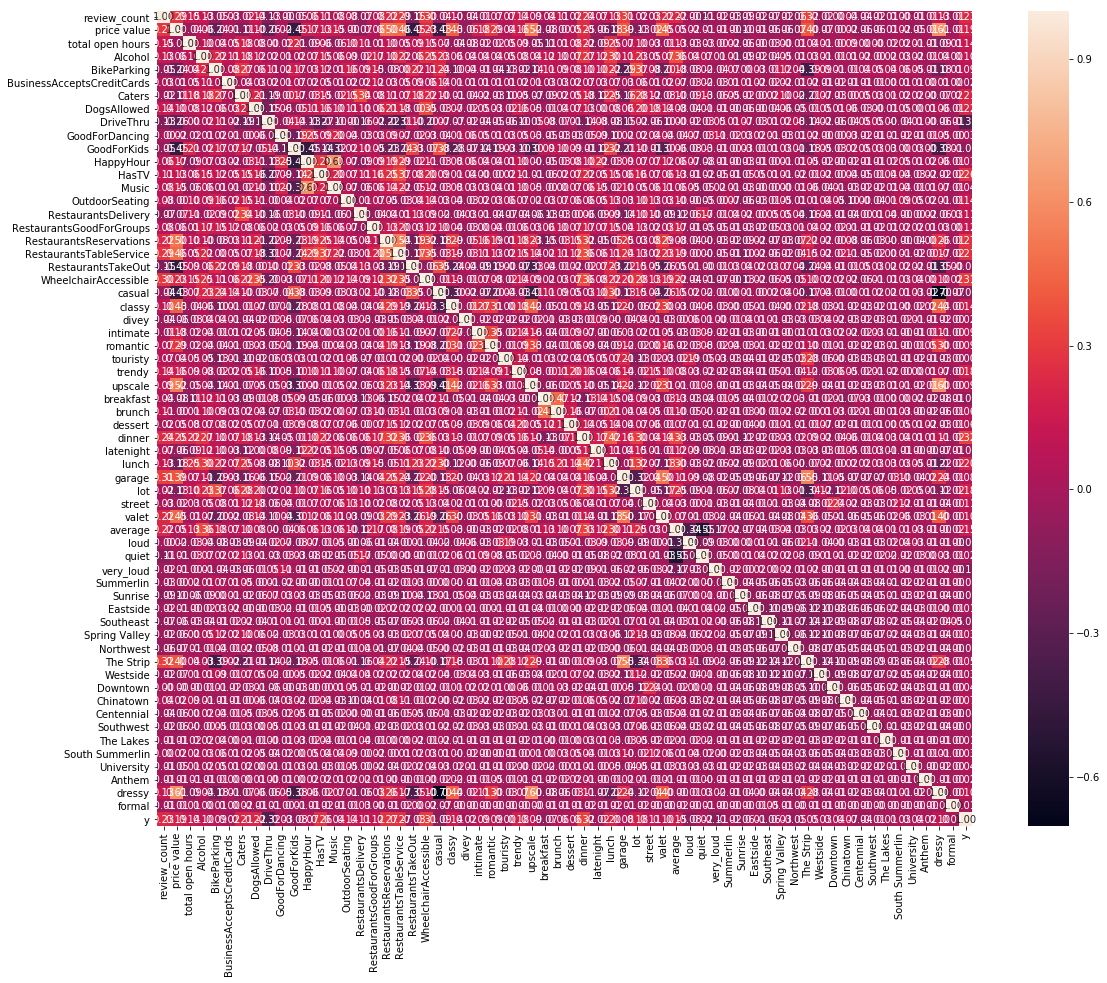

In [11]:
plt.subplots(figsize=(20, 15))
sns.heatmap(df3.corr(), fmt='.2f', annot=True, square=True)

## Separate into four halves

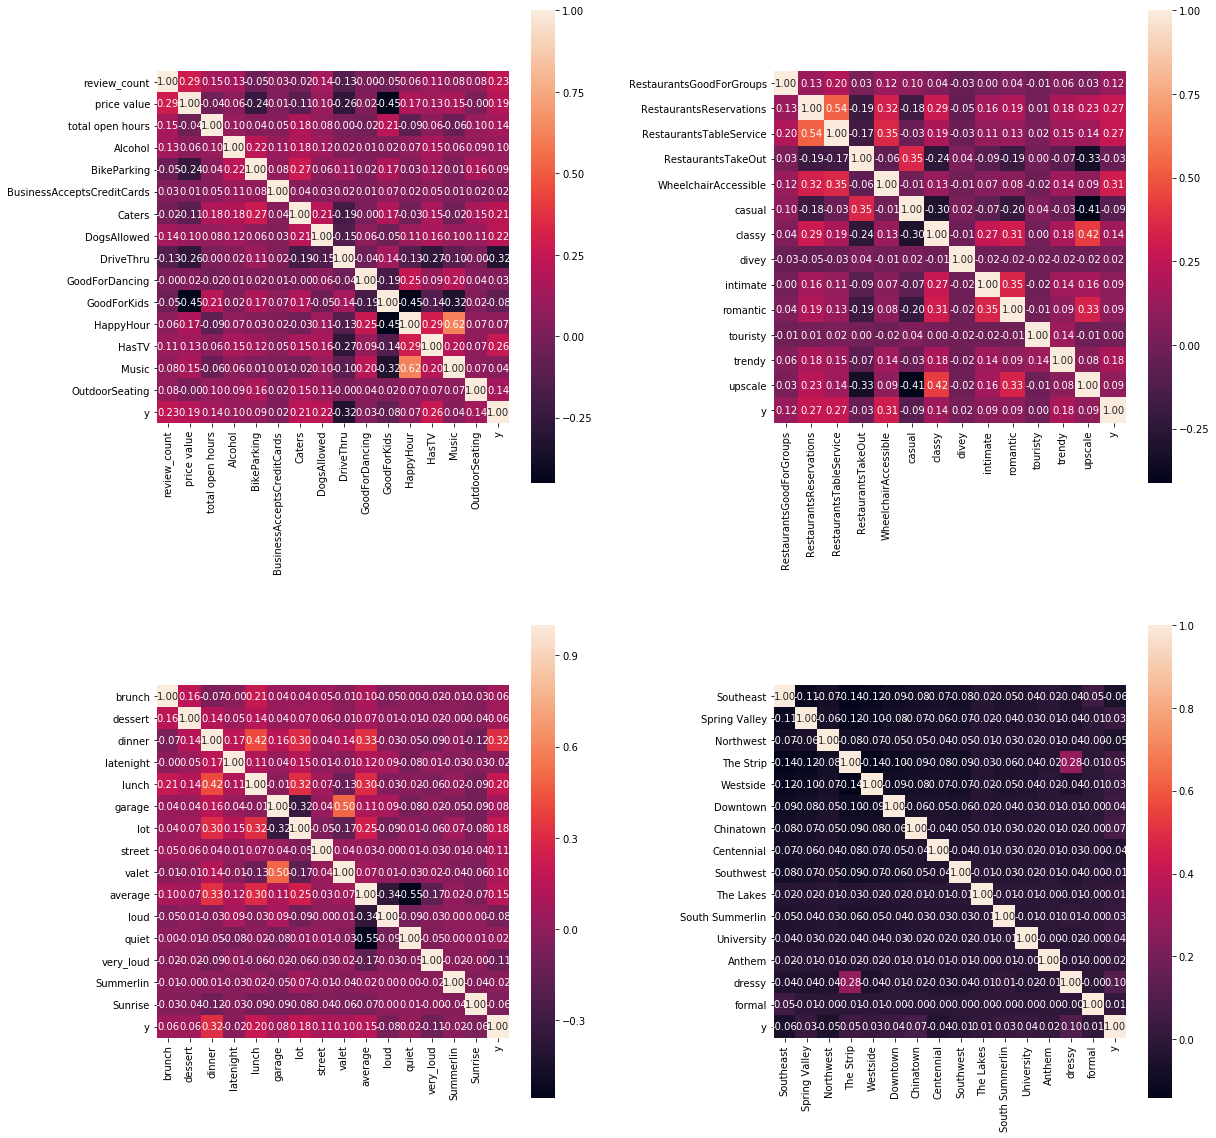

In [12]:
plt.figure(figsize=(30, 20))
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

for i in range(4):
    a = 16*i
    b = a+ 15
    sel_columns = np.array(X.columns[a:b])
    sel_2 = np.append(sel_columns, 'y')
    
    if (i%2 == 0): plt.subplot(grid[i//2, :1])
    else: plt.subplot(grid[i//2, 1:2])
    sns.heatmap(df3[sel_2].corr(), fmt='.2f', annot=True, square=True)
    

In [13]:
rm_features = df3.corr()
rm_features[(rm_features['y'] <0.1) & (rm_features['y'] > -0.1)]['y']

BikeParking                   0.086728
BusinessAcceptsCreditCards    0.016198
GoodForDancing                0.026850
GoodForKids                  -0.084122
HappyHour                     0.070737
Music                         0.043890
RestaurantsTakeOut           -0.030459
casual                       -0.089722
divey                         0.017093
intimate                      0.088523
romantic                      0.089367
touristy                      0.002367
upscale                       0.093086
breakfast                    -0.072860
brunch                        0.061586
dessert                       0.064050
latenight                    -0.024068
garage                        0.075306
valet                         0.099453
loud                         -0.083121
quiet                         0.022455
Summerlin                    -0.015604
Sunrise                      -0.061420
Eastside                      0.013164
Southeast                    -0.062424
Spring Valley            

## Decorrelate features and feature reduction

In [14]:
remove_these = rm_features[(rm_features['y'] <0.1) & (rm_features['y'] > -0.1)]['y']
remove_names = remove_these.index

## Numerical features

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


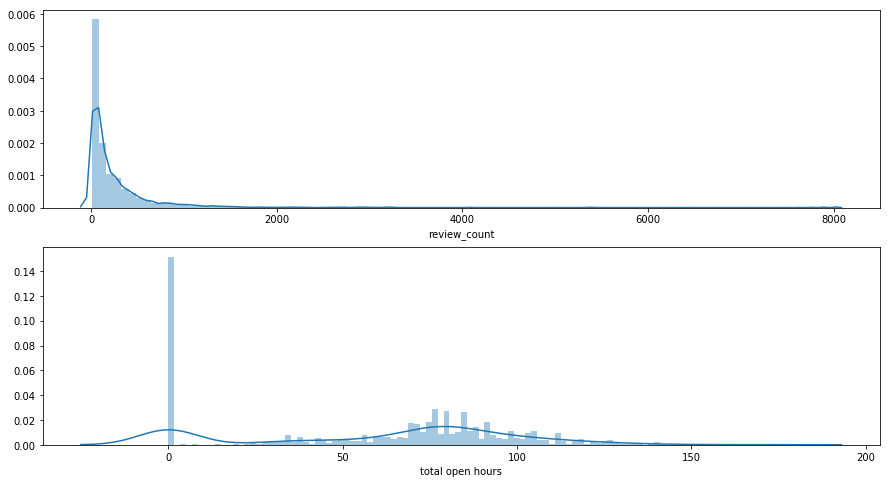

In [15]:
num_features = ['review_count', 'total open hours']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(num_features):
    plt.subplot(2, len(num_features)//2, i+1)
    sns.distplot(df3[feature], bins=100, norm_hist=True, axlabel=feature)

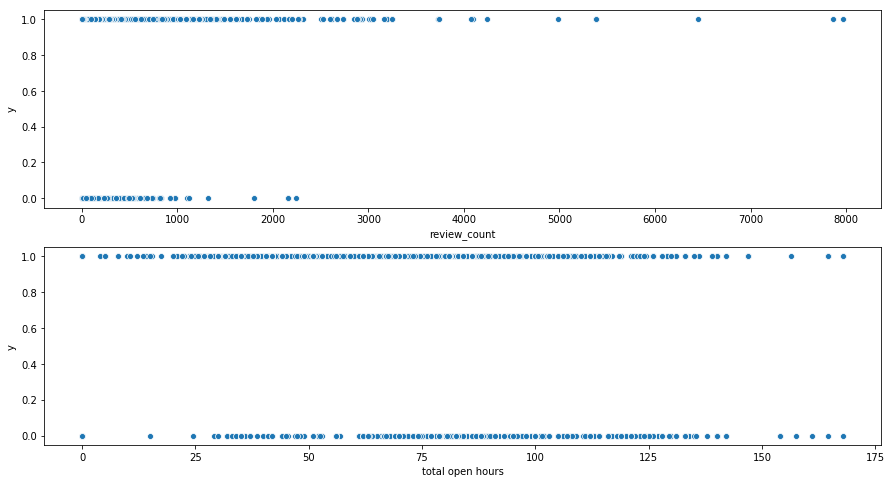

In [16]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(num_features):
    plt.subplot(2, len(num_features)//2, i+1)
    #plt.scatter(feature, 'count', data = train_data)
    sns.scatterplot(x=feature, y='y', data=df3)

## Prediction after feature reduction

In [17]:
remove_names

Index(['BikeParking', 'BusinessAcceptsCreditCards', 'GoodForDancing',
       'GoodForKids', 'HappyHour', 'Music', 'RestaurantsTakeOut', 'casual',
       'divey', 'intimate', 'romantic', 'touristy', 'upscale', 'breakfast',
       'brunch', 'dessert', 'latenight', 'garage', 'valet', 'loud', 'quiet',
       'Summerlin', 'Sunrise', 'Eastside', 'Southeast', 'Spring Valley',
       'Northwest', 'The Strip', 'Westside', 'Downtown', 'Chinatown',
       'Centennial', 'Southwest', 'The Lakes', 'South Summerlin', 'University',
       'Anthem', 'formal'],
      dtype='object')

In [18]:
X = X.drop(columns = remove_names)

In [19]:
X.head()

,review_count,price value,total open hours,Alcohol,Caters,DogsAllowed,DriveThru,HasTV,OutdoorSeating,RestaurantsDelivery,...,WiFi,classy,trendy,dinner,lunch,lot,street,average,very_loud,dressy
0,13,5.0,84.0,1,1,0,0,0,0,0,...,0.0,0,0,1,1,1,0,1.0,0.0,0.0
1,242,20.0,70.5,1,0,0,0,1,0,0,...,0.0,0,0,0,1,0,0,1.0,0.0,0.0
2,16,5.0,91.0,1,0,0,1,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0,0.0
3,19,20.0,88.0,1,0,0,0,0,0,1,...,0.0,0,0,0,0,0,0,0.0,0.0,0.0
4,3,5.0,0.0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0,0.0


In [20]:
from sklearn import metrics 
from sklearn.model_selection import  KFold, train_test_split, cross_val_score 


def model_score(model):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    m_score = cross_val_score(model, X, y, scoring="accuracy", cv=kf)
    return (m_score.mean())

In [21]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC as SVC
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn.neural_network import MLPClassifier as MLP

model_list = [LR(),KN(),DT(),RF(),SVC(), GB(),MLP()]


score_l = []
for model in model_list:
    score_l.append(model_score(model))
    
d={'Model':model_list,'Score':score_l}   
res_frame=pd.DataFrame(d)
res_frame

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

,Model,Score
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.763135
1,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.734424
2,"DecisionTreeClassifier(class_weight=None, crit...",0.712030
3,"RandomForestClassifier(bootstrap=True, class_w...",0.768303
4,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.738157
5,GradientBoostingClassifier(criterion='friedman...,0.790411
6,"MLPClassifier(activation='relu', alpha=0.0001,...",0.770887


## GridSearch 

In [22]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 60}
sns.set_context("poster")

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


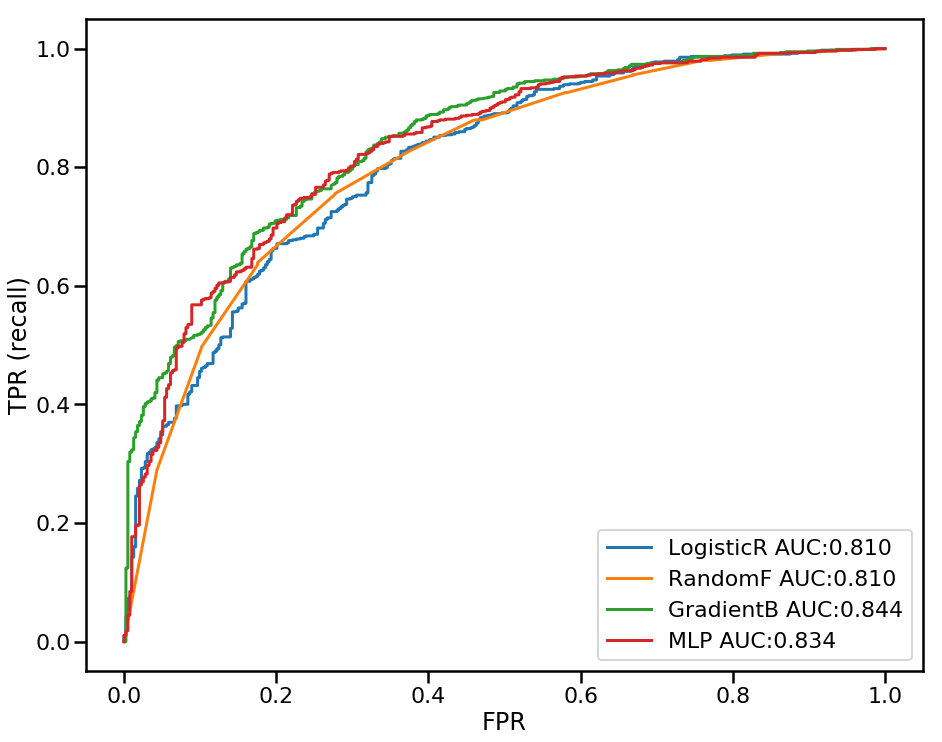

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model_list = [LR(),RF(),GB(),MLP()]
name_list = ['LogisticR', 'RandomF', 'GradientB', 'MLP']

plt.figure(figsize=(15, 12))
for i, model in enumerate(model_list):
    model.fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=name_list[i] +" AUC:{:.3f}".format(auc))
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    close_zero = np.argmin(np.abs(thresholds))
    #plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,label="threshold zero", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)

## RandomForest Classifier

In [24]:
forest = RF()
forest.fit(X,y)
importances = forest.feature_importances_

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
feature_list = X.columns
feature_list

Index(['review_count', 'price value', 'total open hours', 'Alcohol', 'Caters',
       'DogsAllowed', 'DriveThru', 'HasTV', 'OutdoorSeating',
       'RestaurantsDelivery', 'RestaurantsGoodForGroups',
       'RestaurantsReservations', 'RestaurantsTableService', 'Smoking',
       'WheelchairAccessible', 'WiFi', 'classy', 'trendy', 'dinner', 'lunch',
       'lot', 'street', 'average', 'very_loud', 'dressy'],
      dtype='object')

In [26]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]



# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_list[indices[f]], importances[indices[f]]))



Feature ranking:
1. feature review_count (0.305213)
2. feature total open hours (0.186322)
3. feature HasTV (0.048153)
4. feature DriveThru (0.042750)
5. feature dinner (0.037827)
6. feature WheelchairAccessible (0.036021)
7. feature RestaurantsTableService (0.035539)
8. feature price value (0.033221)
9. feature Caters (0.030199)
10. feature RestaurantsReservations (0.029538)
11. feature OutdoorSeating (0.029212)
12. feature lunch (0.027993)
13. feature average (0.027909)
14. feature lot (0.026161)
15. feature RestaurantsDelivery (0.022348)
16. feature RestaurantsGoodForGroups (0.018223)
17. feature DogsAllowed (0.016596)
18. feature trendy (0.010939)
19. feature Alcohol (0.010183)
20. feature Smoking (0.008210)
21. feature street (0.006922)
22. feature very_loud (0.005083)
23. feature classy (0.002782)
24. feature dressy (0.002657)
25. feature WiFi (0.000000)


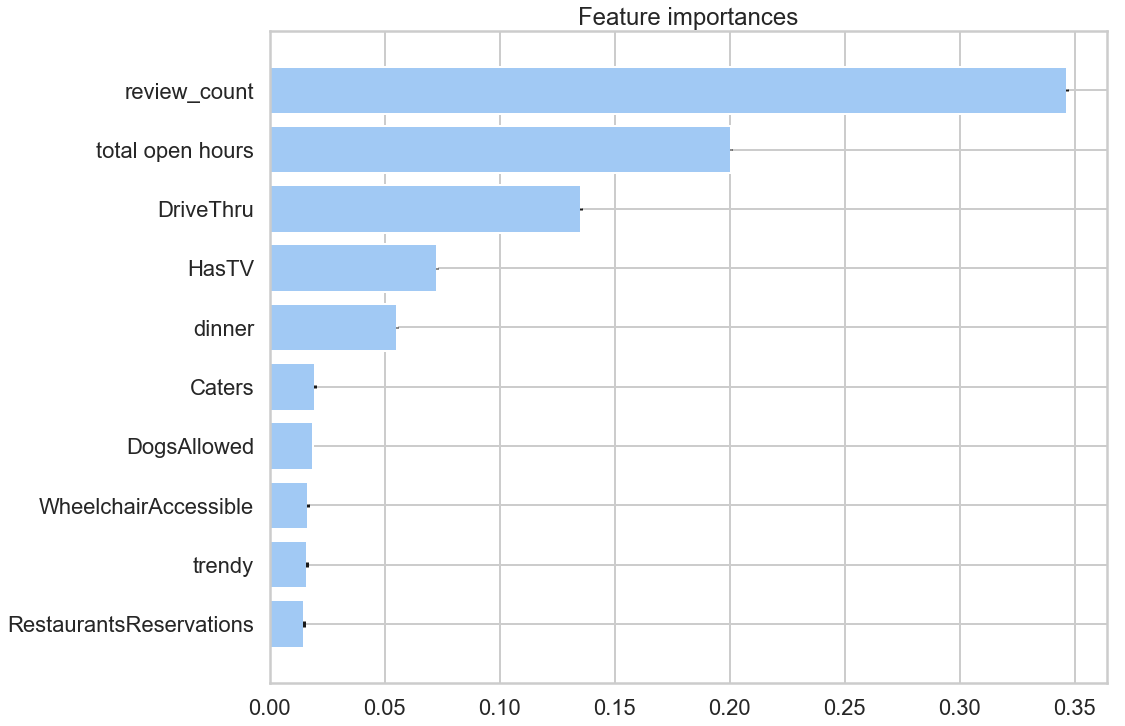

In [95]:

feature_names = X.columns 

indices = np.argsort(importances)[::-1]
top_k = 10
new_indices = indices[:top_k]
features = feature_names[indices[:top_k]]



plt.figure(figsize=(15, 12))
plt.title("Feature importances")
plt.barh(range(top_k), importances[new_indices[::-1]],
      color="b", yerr=std[new_indices], align="center")

data_features = pd.DataFrame(list(zip(range(top_k), importances[new_indices[::-1]])), columns = ['topk', 'importances'])

plt.yticks(range(top_k), features[::-1], )
plt.ylim([-1, top_k])
locs, labels = plt.yticks()
forest_plot = plt.setp(labels, rotation=0)




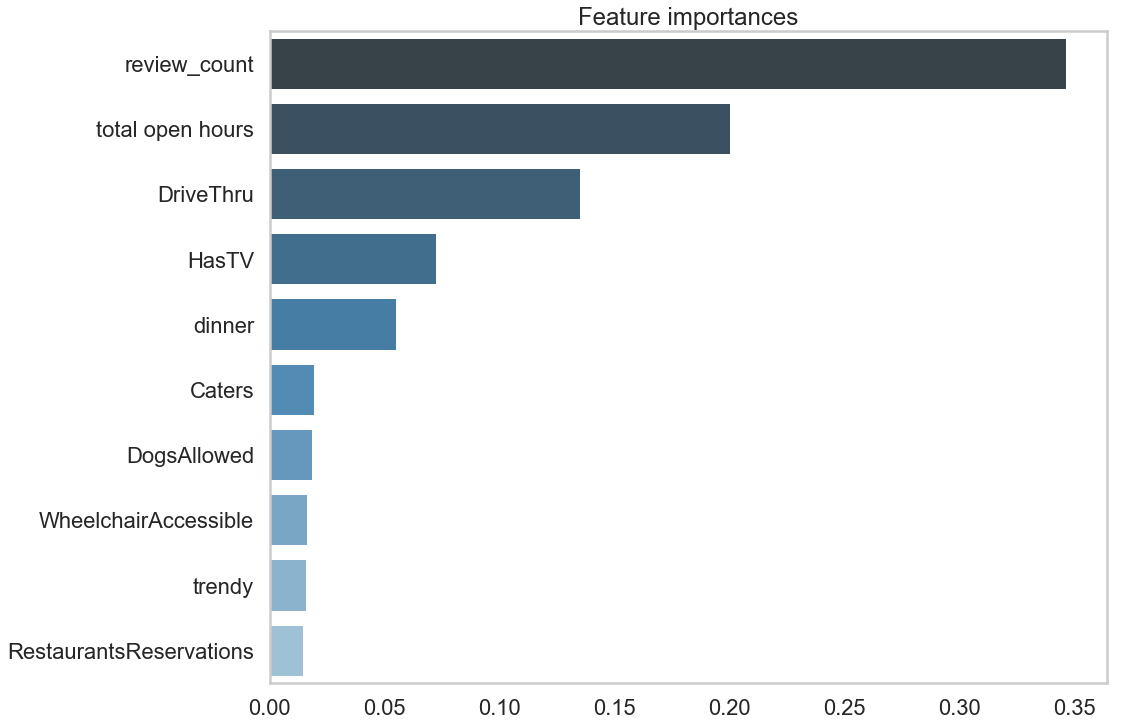

In [97]:
## plot feature importances
feature_names = X.columns 

indices = np.argsort(importances)[::-1]
top_k = 10
new_indices = indices[:top_k]
features = feature_names[indices[:top_k]]



# Plot the feature importances of the forest
f, ax = plt.subplots(figsize=(15, 12))
#plt.figure(figsize=(15, 12))
plt.title("Feature importances")
#sns.set_color_codes("pastel")
sns.set_context("poster")

data_features = pd.DataFrame(list(zip(features, importances[new_indices])), columns = ['topk', 'importances'])
data_feature = data_features.sort_values("importances", ascending=False)
sns.barplot(y = 'topk', x ='importances',data = data_feature, color="b", ci = 'sd',  palette="Blues_d")



#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="", xlabel="")
# sns.despine(left=True, bottom=True)
ax.grid(False)

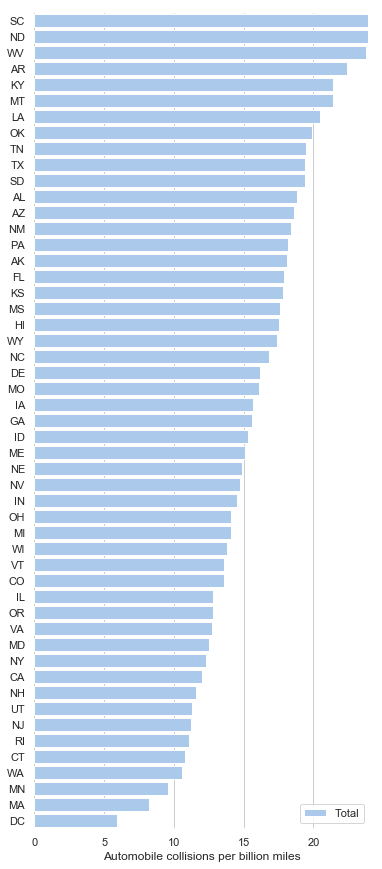

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# # Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(x="alcohol", y="abbrev", data=crashes,
#             label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)



In [34]:
import pickle as pkl
pkl.dump(forest, open('rf_model.pkl', 'wb')) 
pkl.dump(X.columns.tolist(), open('rf_colnames.pkl', 'wb')) 



In [35]:
X.columns

Index(['review_count', 'price value', 'total open hours', 'Alcohol', 'Caters',
       'DogsAllowed', 'DriveThru', 'HasTV', 'OutdoorSeating',
       'RestaurantsDelivery', 'RestaurantsGoodForGroups',
       'RestaurantsReservations', 'RestaurantsTableService', 'Smoking',
       'WheelchairAccessible', 'WiFi', 'classy', 'trendy', 'dinner', 'lunch',
       'lot', 'street', 'average', 'very_loud', 'dressy'],
      dtype='object')

## Gradient Boosting

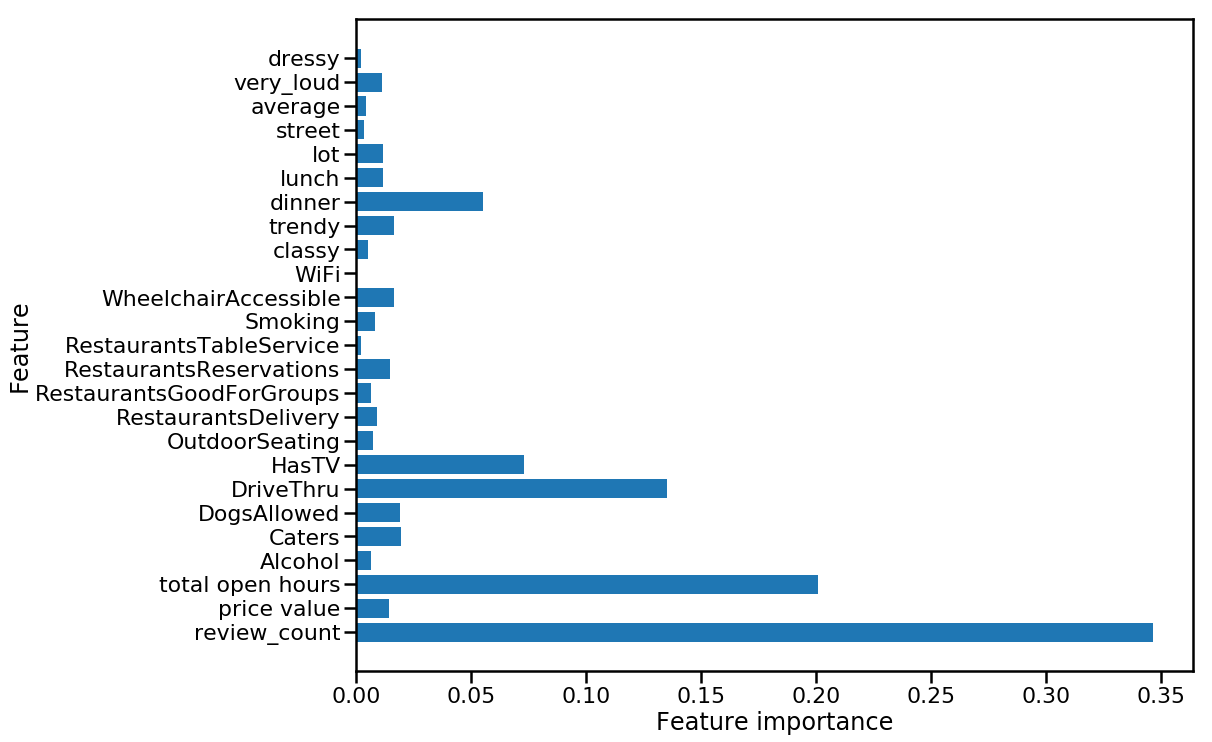

In [36]:
gbrt = GB()
gbrt.fit(X, y)


def plot_feature_importances_gbrt(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plt.figure(figsize=(15, 12))
plot_feature_importances_gbrt(gbrt)

In [37]:
importances = gbrt.feature_importances_

In [38]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_list[indices[f]], importances[indices[f]]))




Feature ranking:
1. feature review_count (0.346498)
2. feature total open hours (0.200577)
3. feature DriveThru (0.135224)
4. feature HasTV (0.072779)
5. feature dinner (0.055237)
6. feature Caters (0.019669)
7. feature DogsAllowed (0.018875)
8. feature WheelchairAccessible (0.016586)
9. feature trendy (0.016356)
10. feature RestaurantsReservations (0.014916)
11. feature price value (0.014240)
12. feature lot (0.011527)
13. feature lunch (0.011444)
14. feature very_loud (0.011120)
15. feature RestaurantsDelivery (0.009019)
16. feature Smoking (0.008014)
17. feature OutdoorSeating (0.007509)
18. feature Alcohol (0.006502)
19. feature RestaurantsGoodForGroups (0.006324)
20. feature classy (0.005299)
21. feature average (0.004406)
22. feature street (0.003575)
23. feature dressy (0.002194)
24. feature RestaurantsTableService (0.002110)
25. feature WiFi (0.000000)


Index(['review_count', 'total open hours', 'DriveThru', 'HasTV', 'dinner',
       'Caters', 'DogsAllowed', 'WheelchairAccessible', 'trendy',
       'RestaurantsReservations'],
      dtype='object')

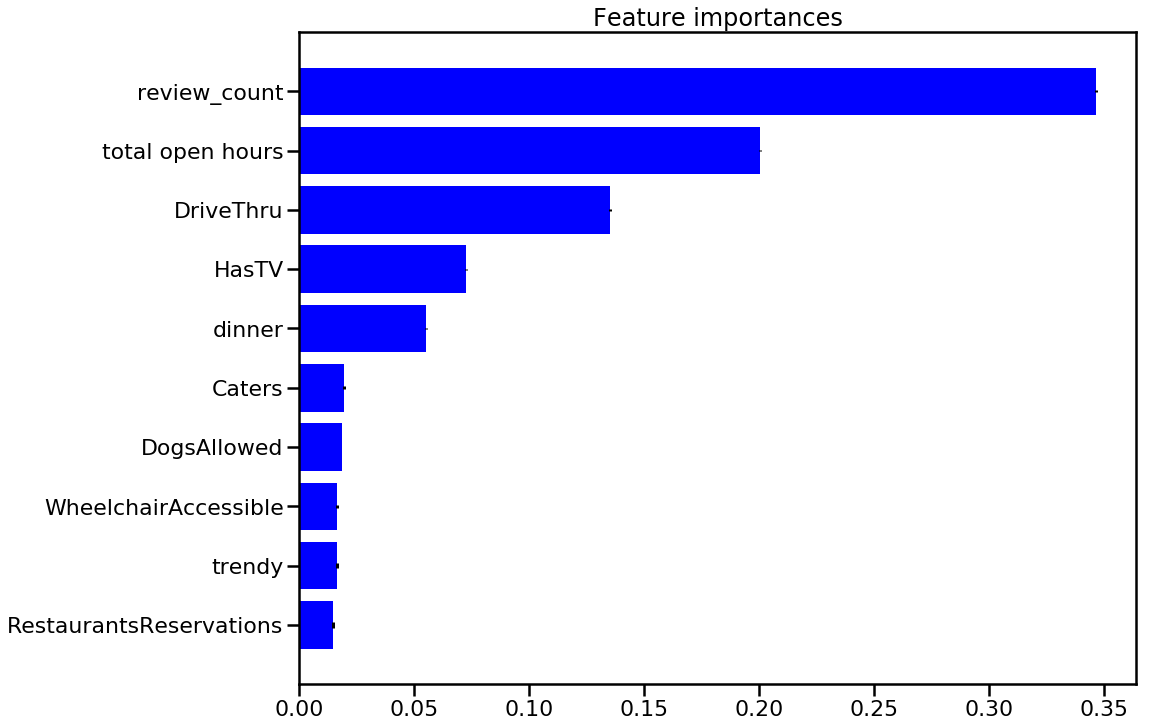

In [39]:
feature_names = X.columns 

indices = np.argsort(importances)[::-1]
top_k = 10
new_indices = indices[:top_k]
features = feature_names[indices[:top_k]]


#import Color
#red = Color("red")
#colors = list(red.range_to(Color("#500000"),10))
#colors = [color.rgb for color in colors]

# Plot the feature importances of the forest
plt.figure(figsize=(15, 12))
plt.title("Feature importances")
plt.barh(range(top_k), importances[new_indices[::-1]],
       color="b", yerr=std[new_indices], align="center")
#sns.barplot(range(top_k), importances[new_indices[::-1]],
       #color="b", yerr=std[new_indices], align="center")
plt.yticks(range(top_k), features[::-1], )
plt.ylim([-1, top_k])
locs, labels = plt.yticks()
forest_plot = plt.setp(labels, rotation=0)
features

In [40]:
import pickle as pkl
pkl.dump(gbrt, open('gbrt_model.pkl', 'wb')) 
pkl.dump(X.columns.tolist(), open('gbrt_colnames.pkl', 'wb')) 


